In [8]:
import pandas as pd
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
dfs = [pd.read_csv(file, sep='\t', header=0) for file in glob('/Users/rbdurfee/Downloads/2017 Ford F150 Ecoboost/Extended Data Set/* Test Data.txt')]

for n, df in enumerate(dfs):
    df['Sequence'] = n

df = pd.concat(dfs, sort=False)

In [3]:
df = df[['Dyno_Spd[mph]',
         'Trans_shift_inprogress_CAN[]',
         'Trans_PRNDL_pos_CAN[]',
         'Pedal_accel_pos_CAN[per]',
         'Trans_gear_desired_CAN[]',
         'Trans_gear_engaged_CAN[]',
         'Eng_start_stop_active_CAN[]',
         'Eng_load_absolute_PCM[per]',
         'Eng_load_PCM[per]',
         'Eng_speed_PCM[rpm]',
         'Brake_pressure_applied_PCM[]',
         'Eng_powertrain_drive_mode_actual_PCM[]',
         'Eng_idle_speed_desired_PCM[rpm]',
         'Eng_torque_control_state_PCM[]',
         'Trans_gear_ratio_measured_TCM[]',
         'Sequence']]

In [4]:
df['index'] = df.index
df = df.set_index(['Sequence', 'index'])

In [5]:
df_std = df.copy()

for col in list(df.columns):
    
    df_std[col] = (df_std[col] - df_std[col].min()) / (df_std[col].max() - df_std[col].min())

<IPython.core.display.Javascript object>


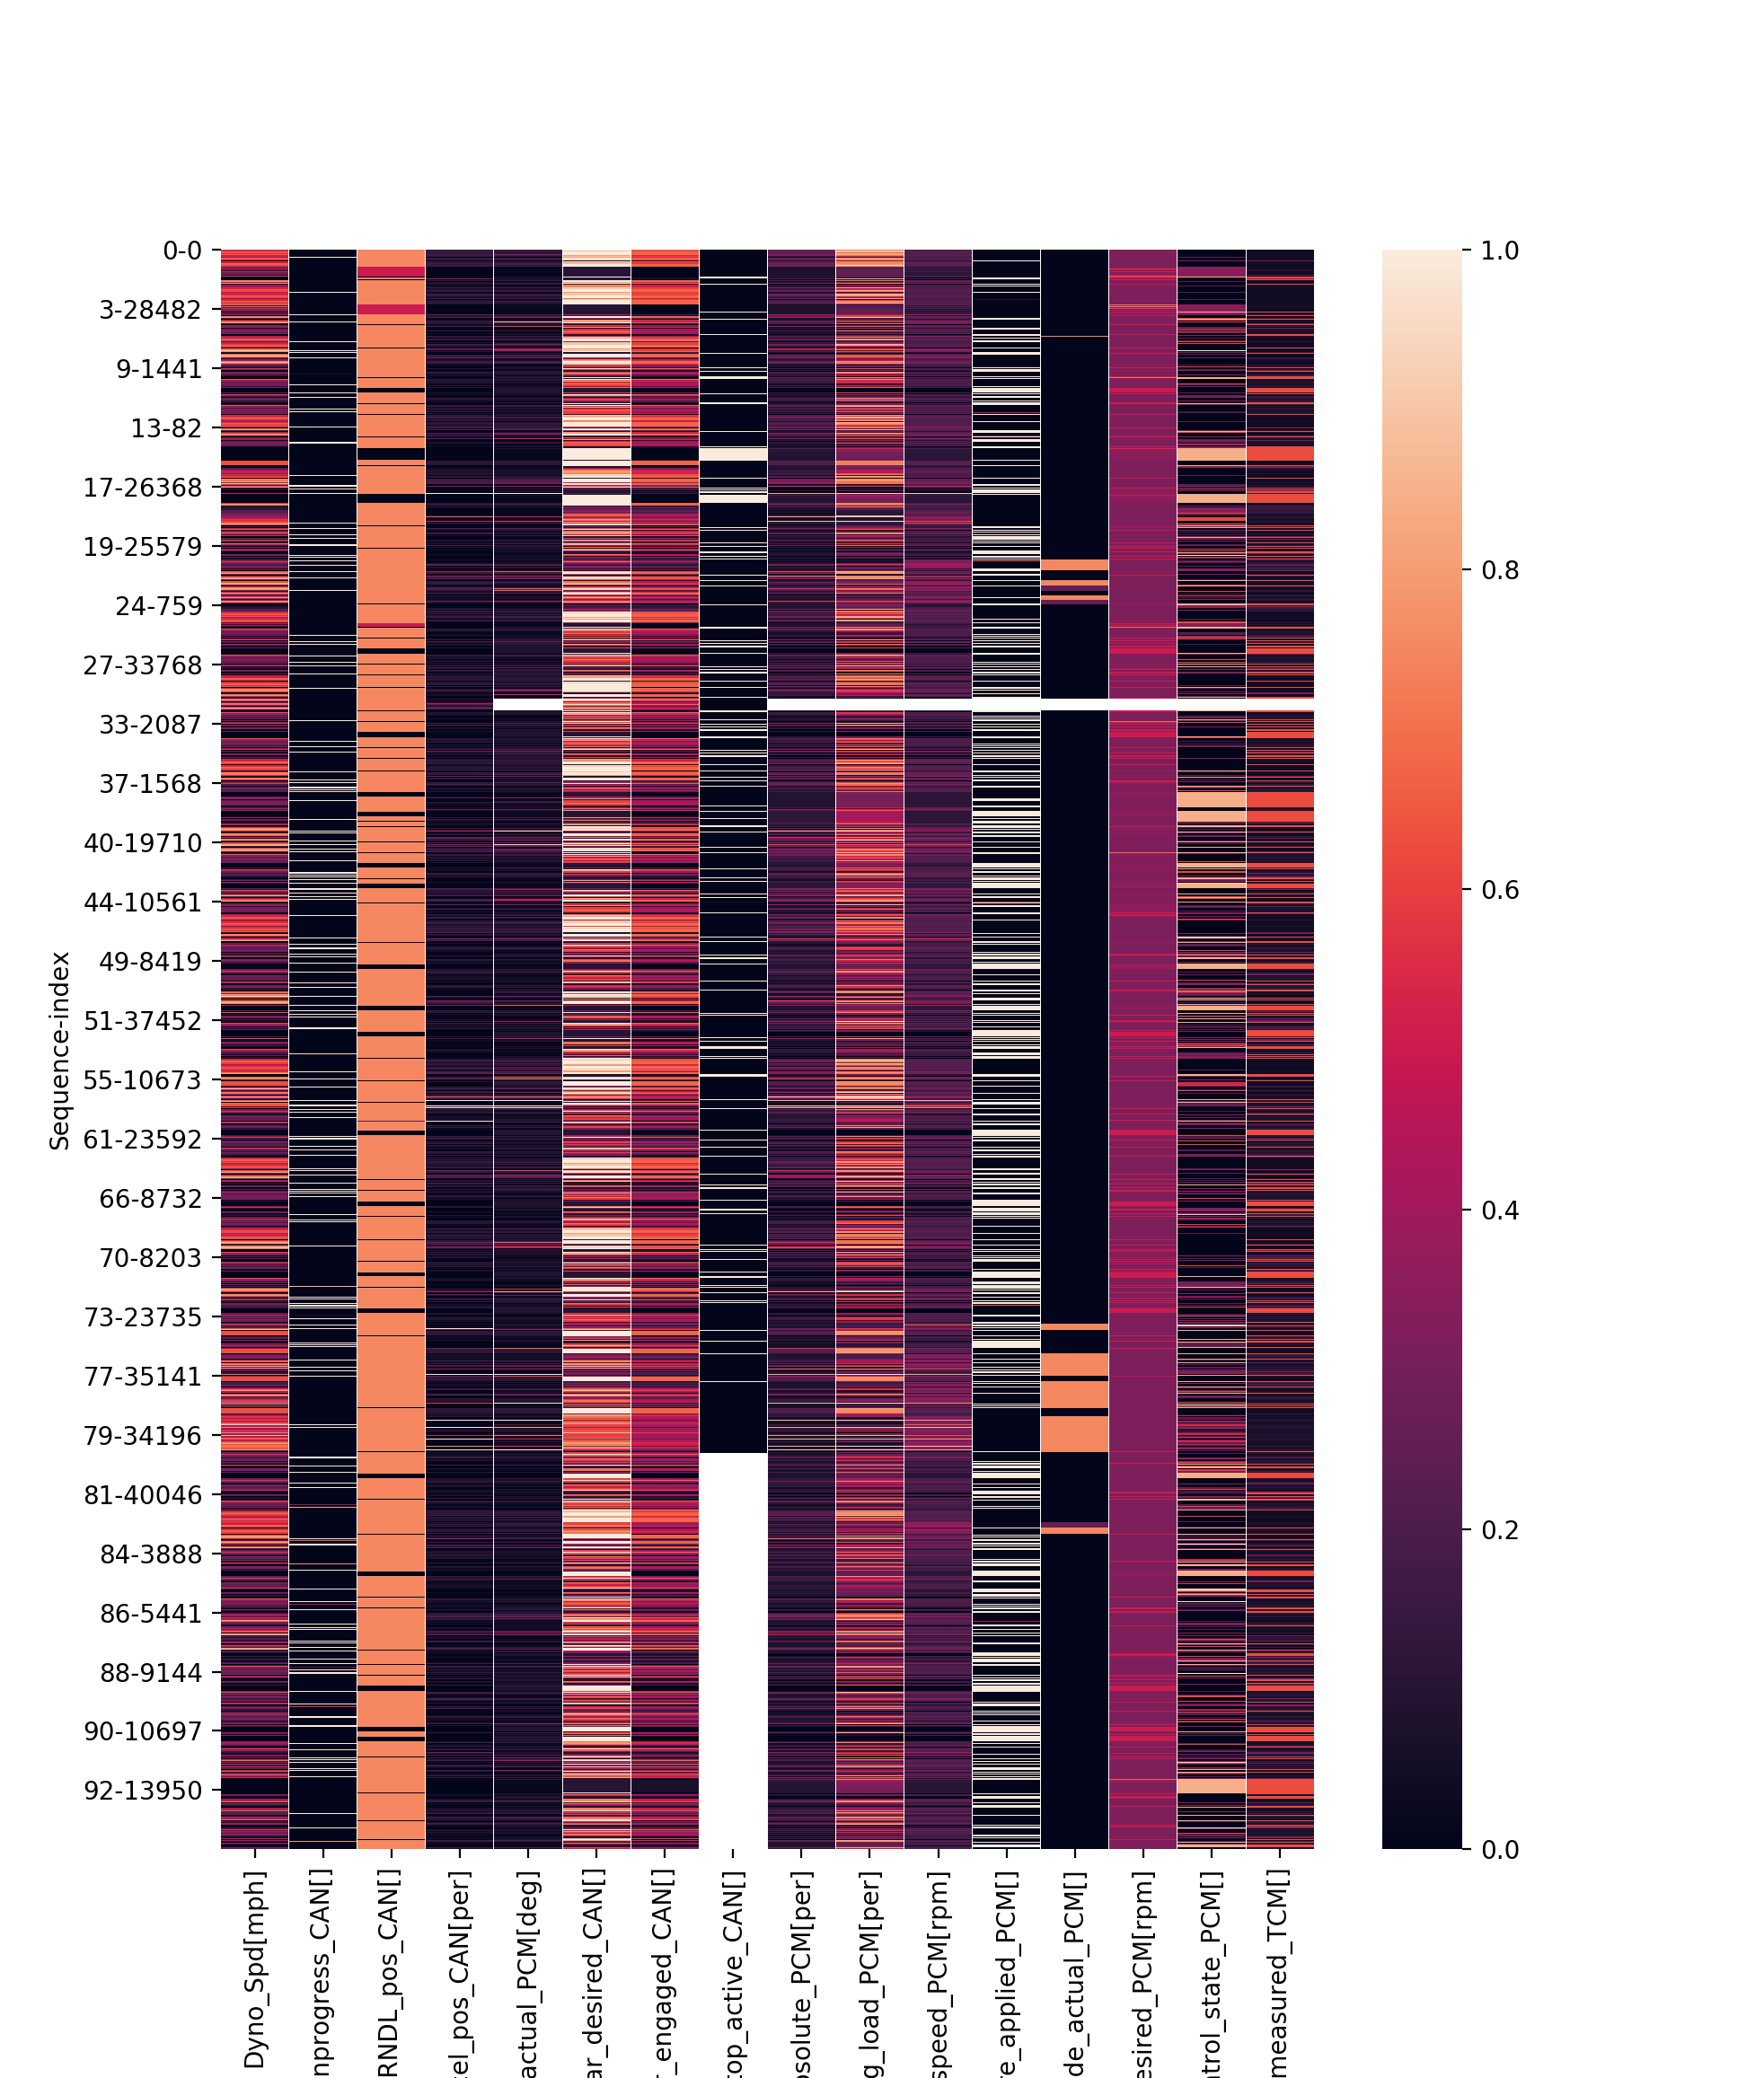

In [6]:
sns.heatmap(df_std)

/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


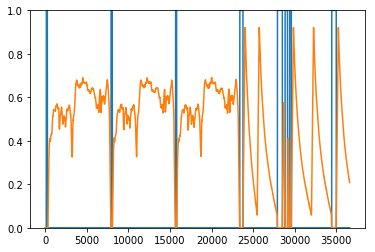

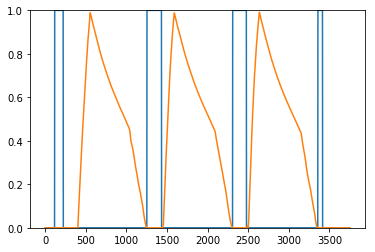

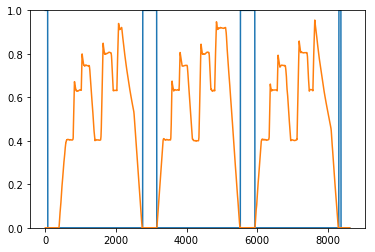

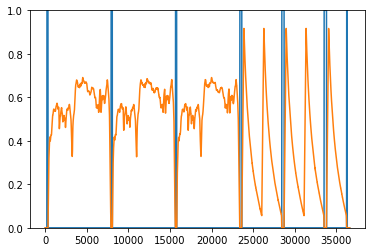

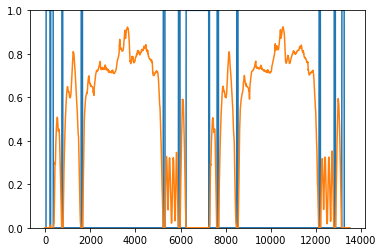

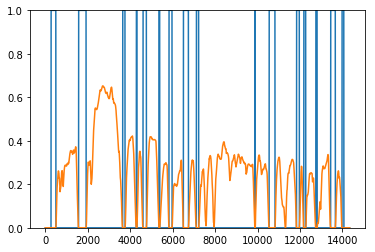

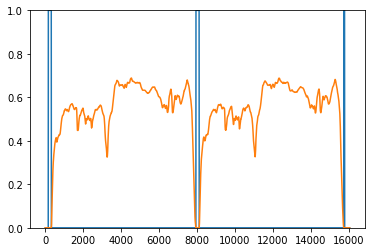

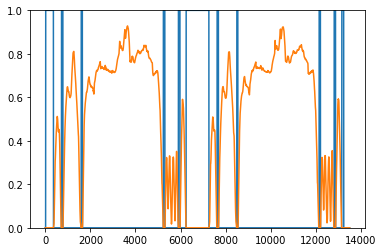

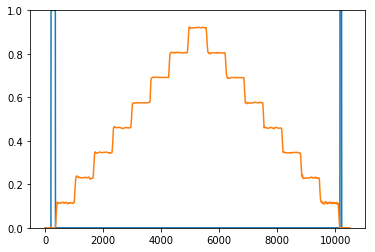

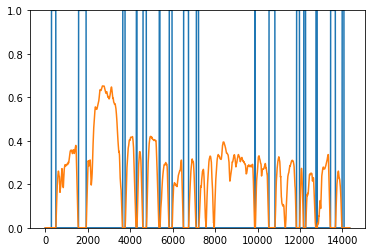

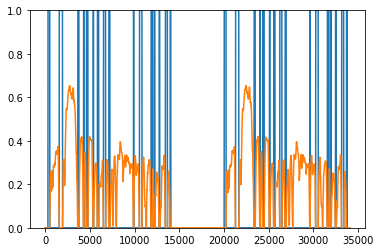

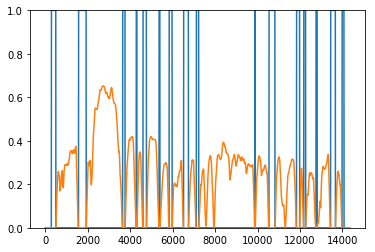

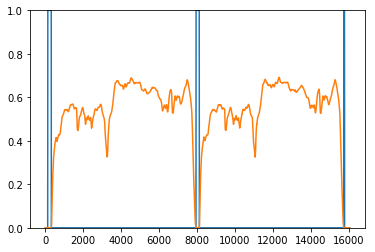

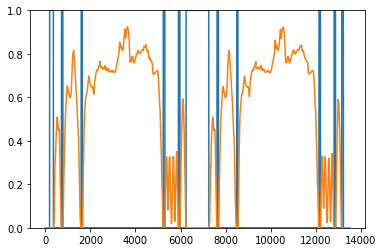

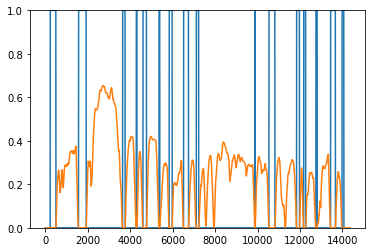

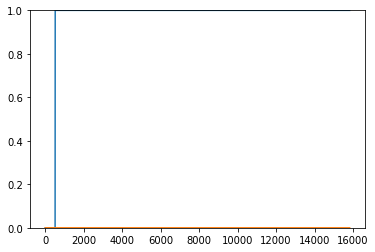

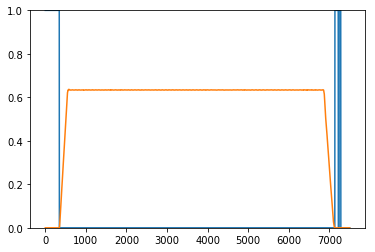

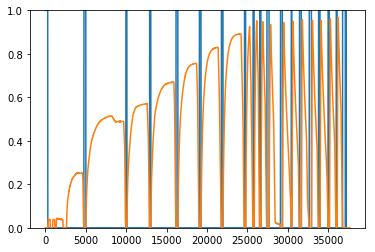

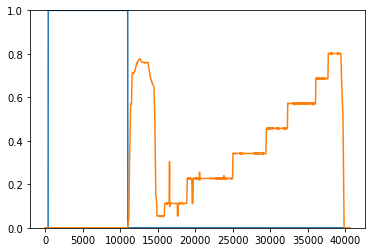

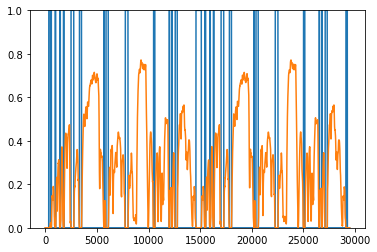

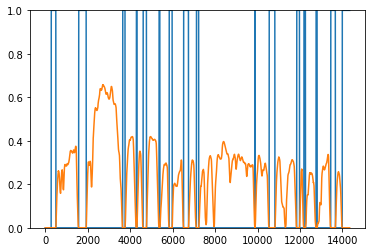

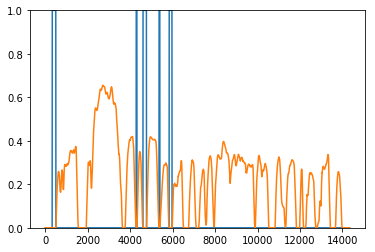

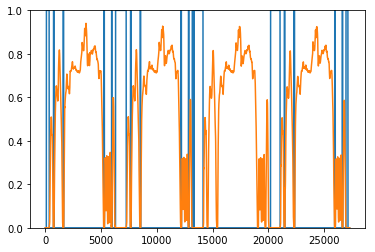

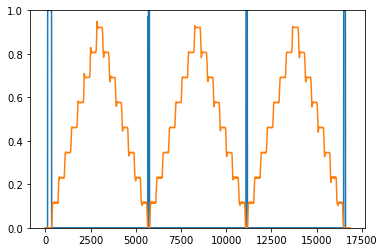

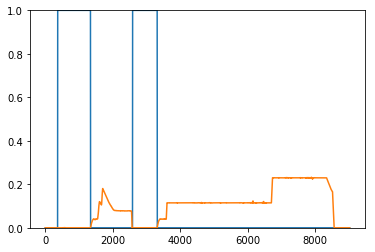

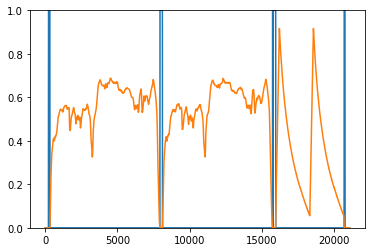

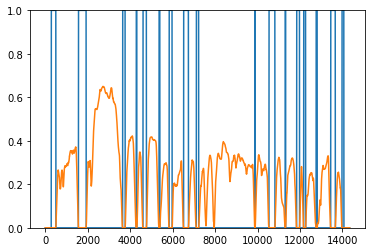

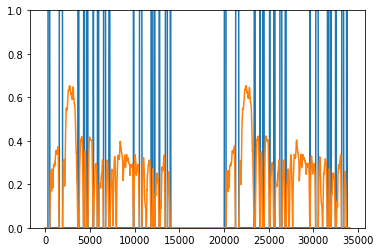

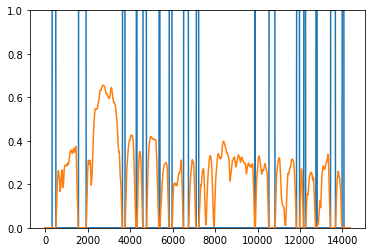

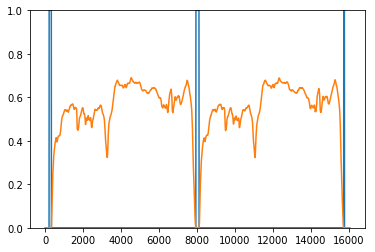

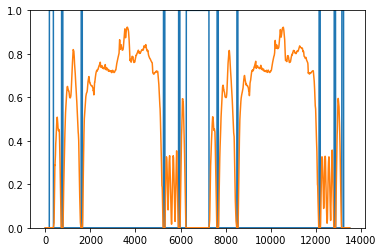

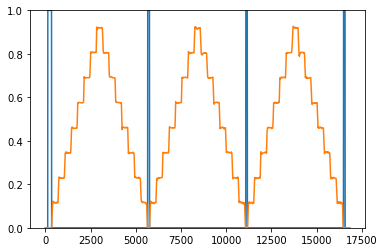

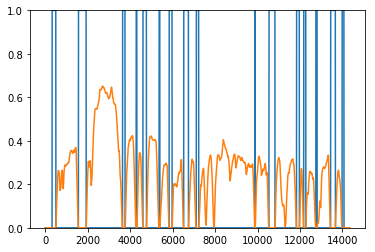

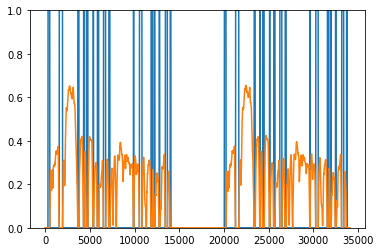

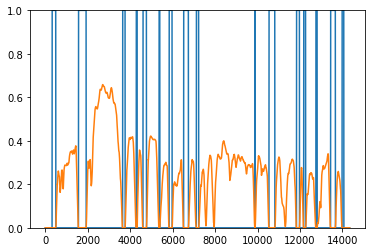

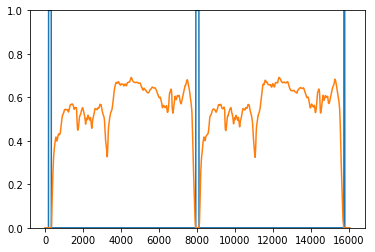

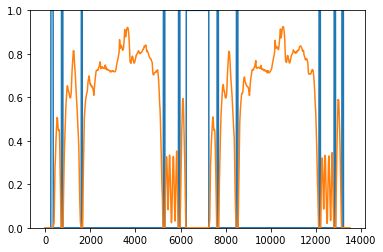

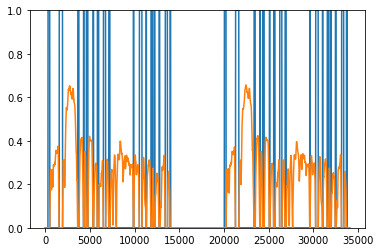

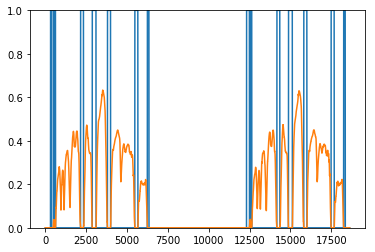

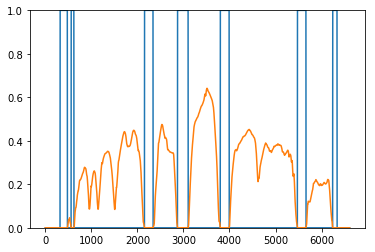

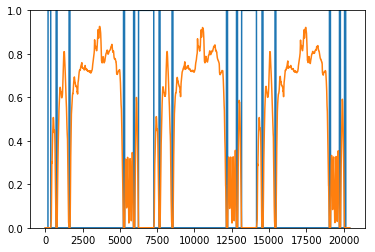

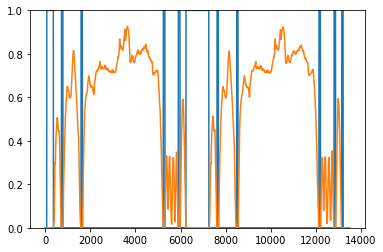

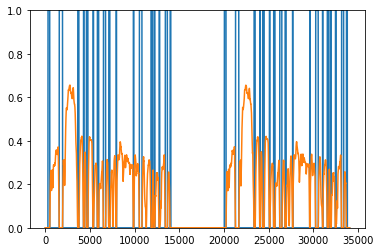

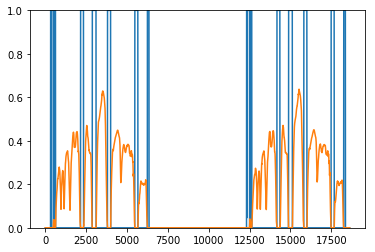

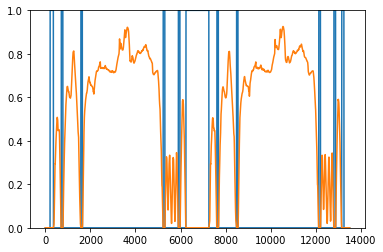

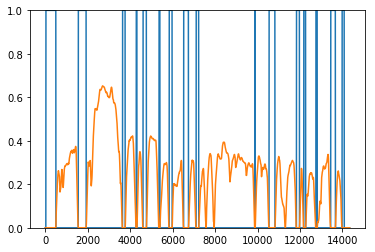

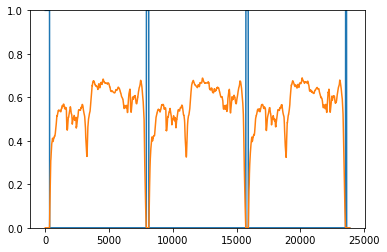

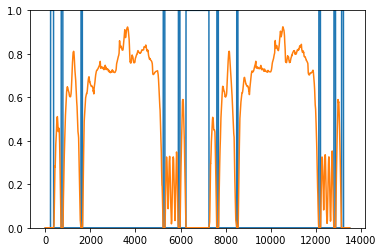

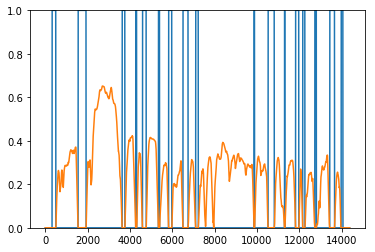

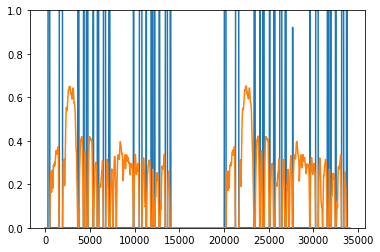

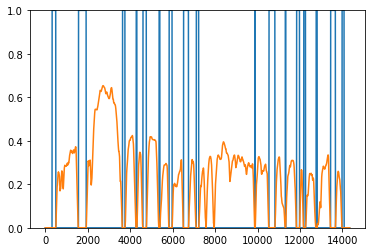

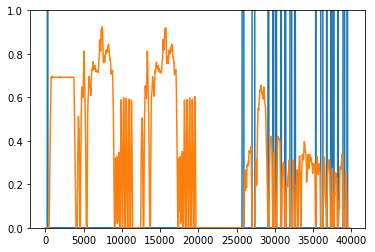

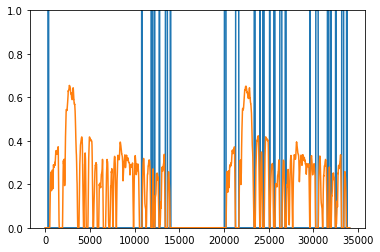

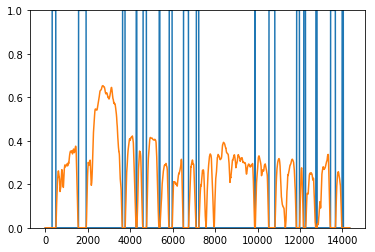

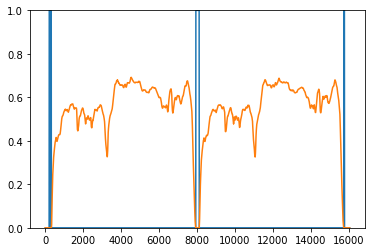

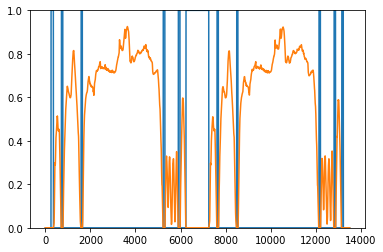

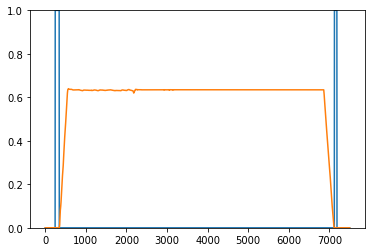

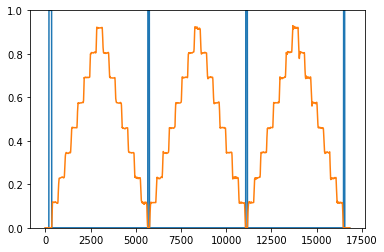

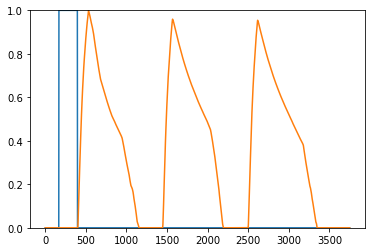

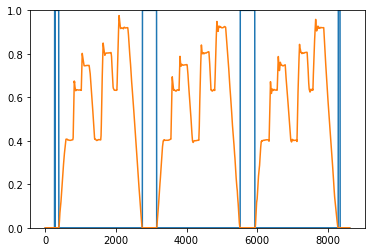

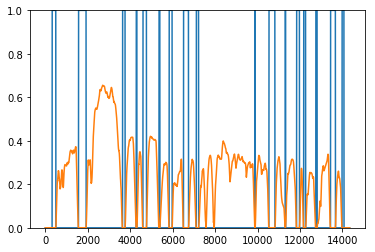

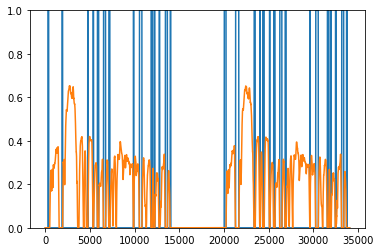

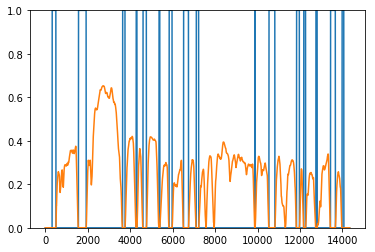

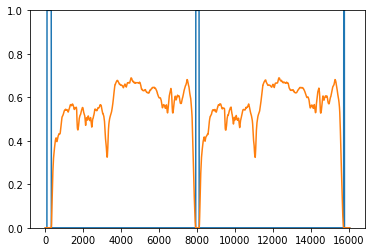

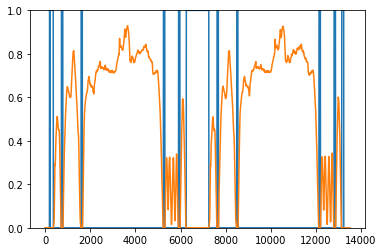

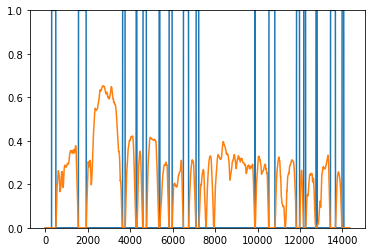

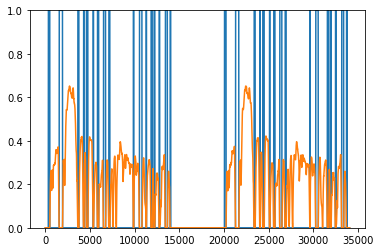

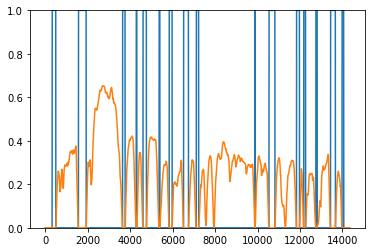

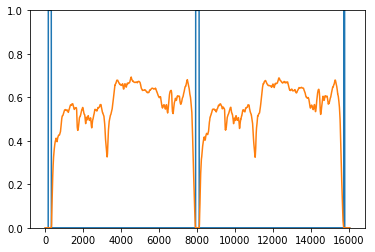

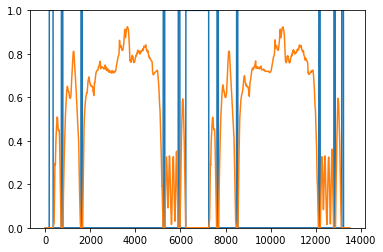

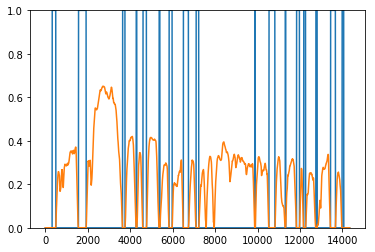

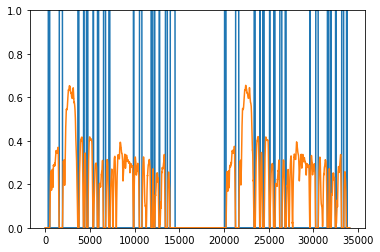

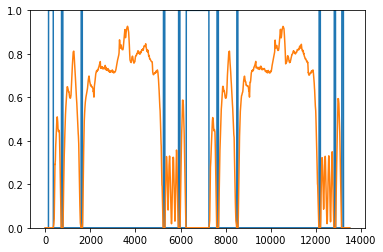

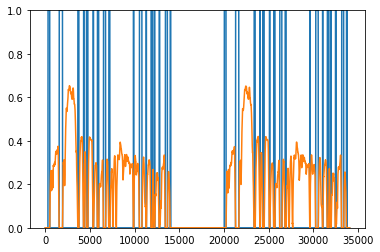

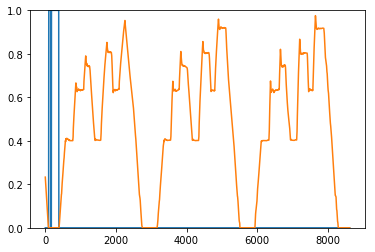

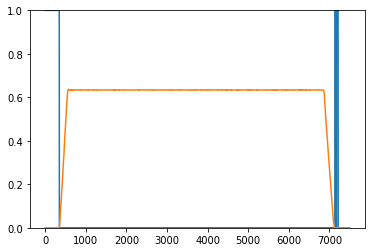

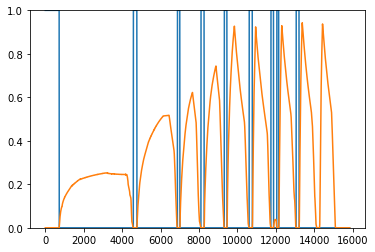

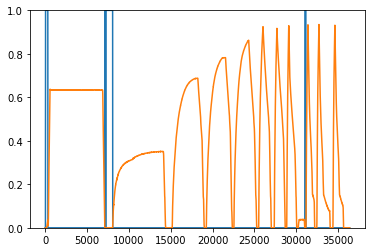

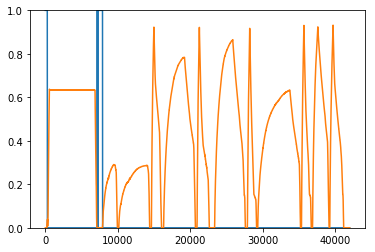

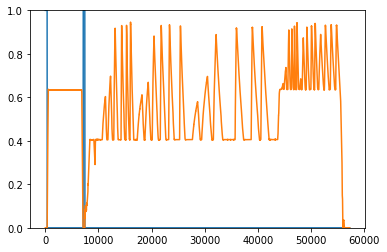

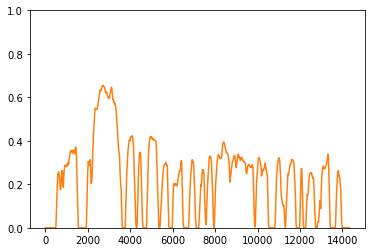

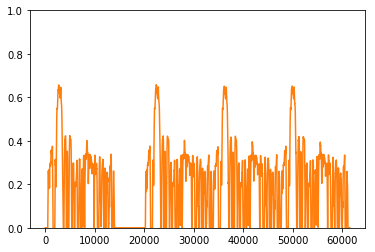

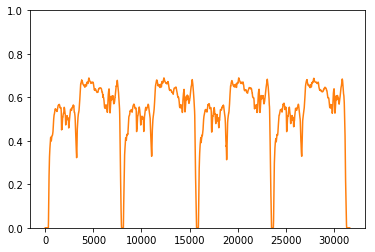

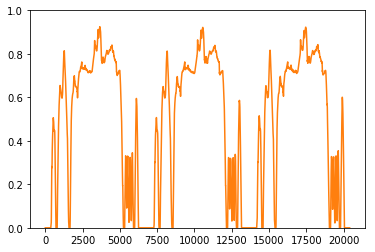

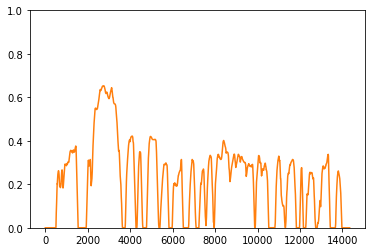

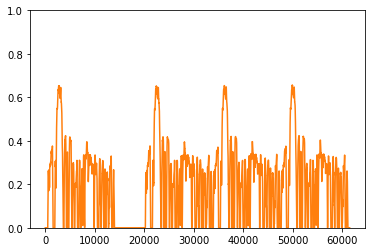

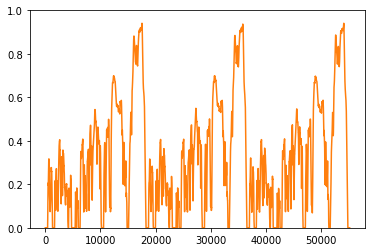

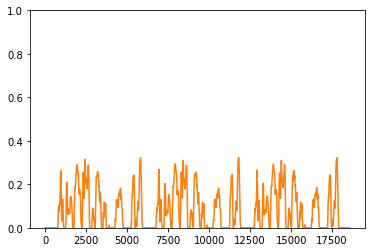

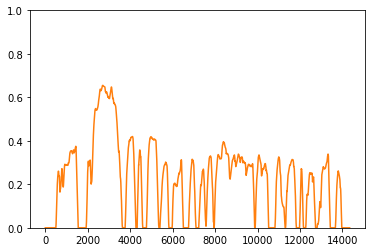

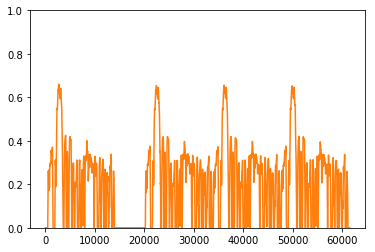

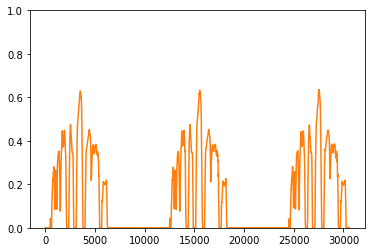

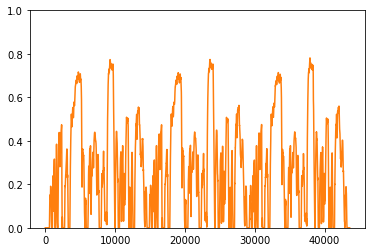

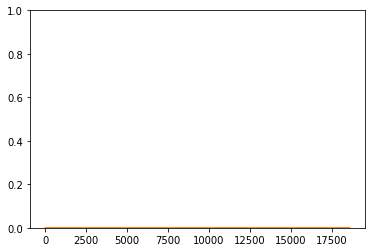

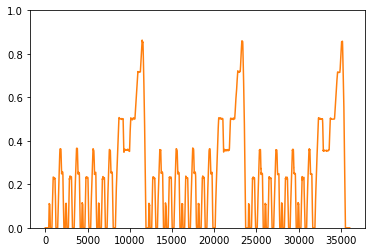

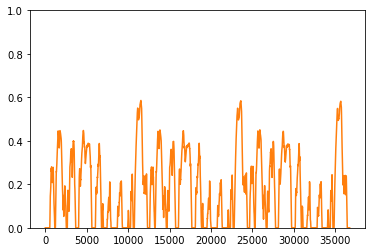

In [9]:
for i in range(95):

    _, ax = plt.subplots()

    for col in [
         'Eng_start_stop_active_CAN[]', 'Dyno_Spd[mph]']:

        ax.plot(range(len(df_std.loc[i])), df_std.loc[i][col], label=col)
        
    ax.set_ylim(0, 1)